__The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning.__

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.

The example below loads the MNIST dataset using the Keras API and creates a plot of the first nine images in the training dataset.

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 
from keras.utils import np_utils
from keras.datasets import mnist 
import tensorflow as tf

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

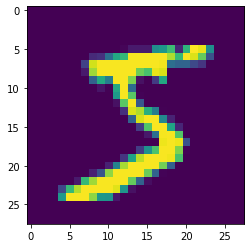

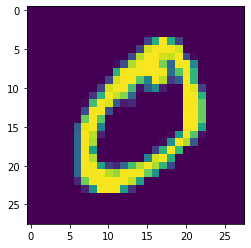

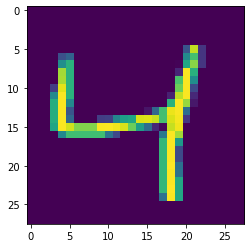

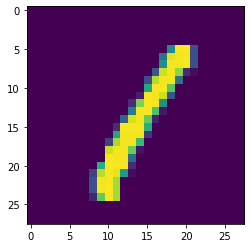

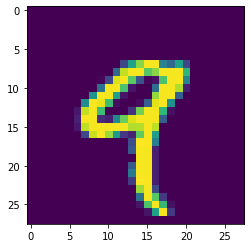

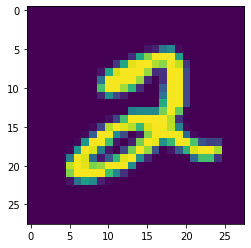

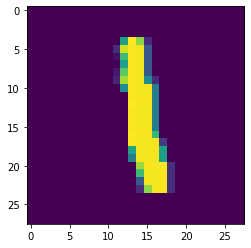

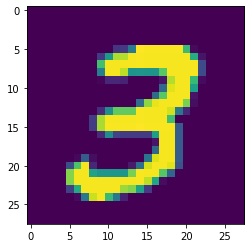

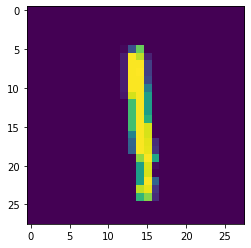

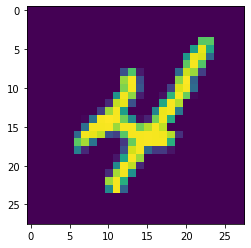

In [7]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.show()

In [8]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [10]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 71s 36ms/step - loss: 0.2064 - accuracy: 0.9383
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0867 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0682 - accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0578 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0495 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0372 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0336 - accuracy: 0.9894
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0301 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 62s 33m

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

## Filters

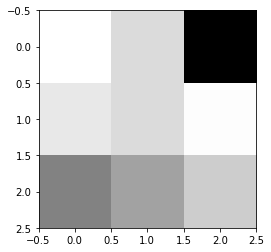

In [27]:
top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

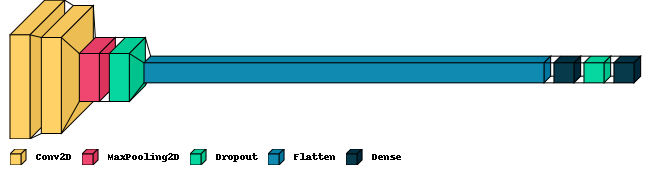

In [48]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True) 

In [16]:
model_json = model.to_json()

In [18]:
import os
os.makedirs('models')
with open("model.json", "w") as f:
    f.write(model_json)
    
model.save_weights("model.h5")

In [19]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
    probs = model.predict(X_test[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
    print("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
    cv2.imshow("Digit", image)
    cv2.waitKey(0)

1/1 [==============================] - 2s 2s/step
Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1
1/1 [==============================] - 0s 26ms/step
Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], predicted 8
1/1 [==============================] - 0s 23ms/step
Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5
1/1 [==============================] - 0s 23ms/step
Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4
1/1 [==============================] - 0s 21ms/step
Actual digit is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 0
1/1 [==============================] - 0s 26ms/step
Actual digit is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], predicted 3
1/1 [==============================] - 0s 26ms/step
Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5
1/1 [==============================] - 0s 25ms/step
Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4
1/1 [==============================] - 0s 24ms/step
Actual digit is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.